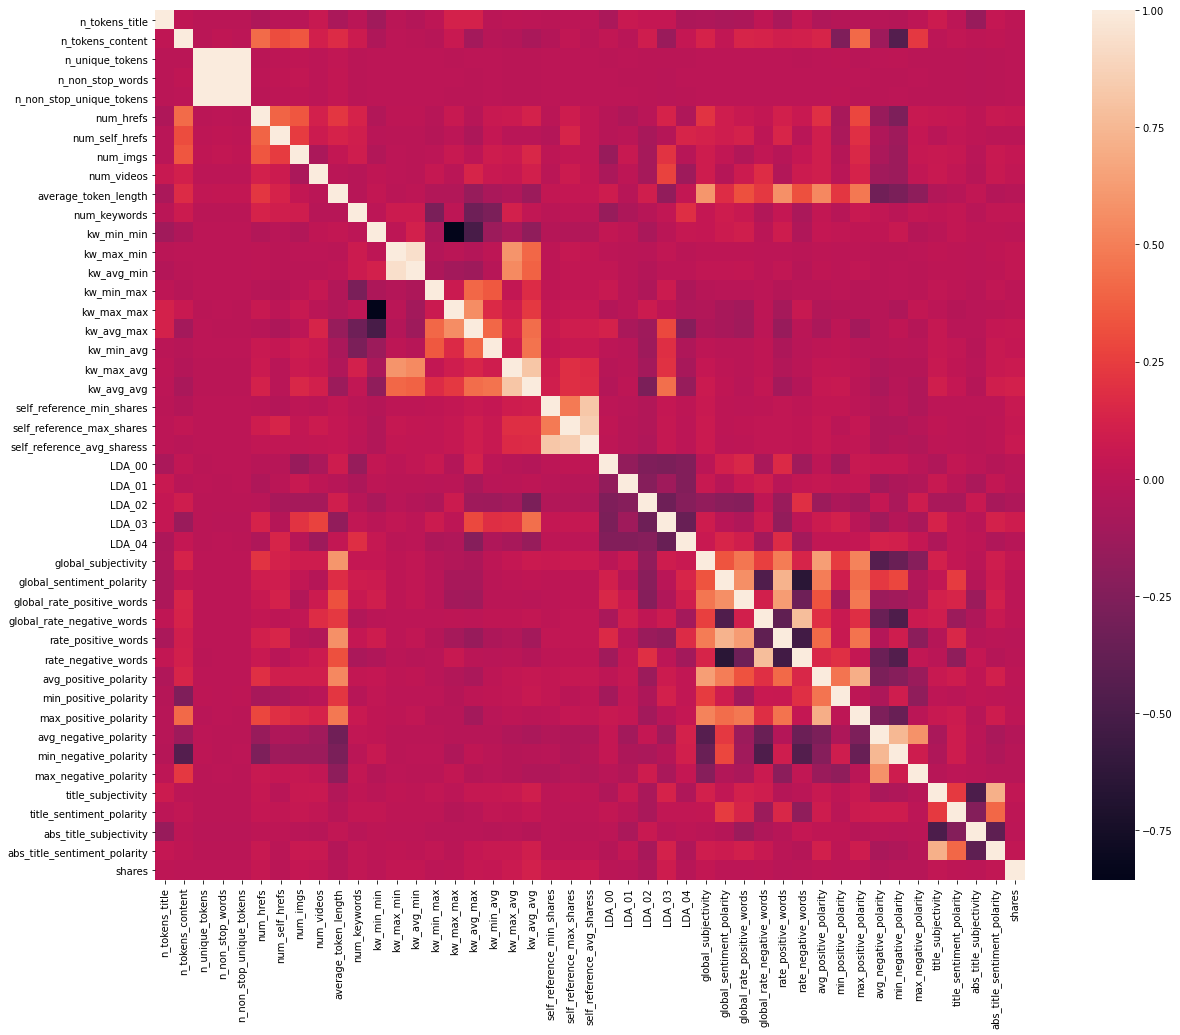

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

df = pd.read_csv("OnlineNewsPopularity.csv").drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
             'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'], axis=1)

plt.subplots(figsize=(24, 16))
sns.heatmap(df.corr(), vmax=1, square=True);

In [162]:
# X = df.drop(['shares', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
#              'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'], axis=1)
# y = df.shares

# X = df[['kw_avg_avg']]
# y = df.shares

# X = df[['global_rate_positive_words', 'rate_positive_words', 'avg_positive_polarity', 'max_positive_polarity']]
# y = df.average_token_length

X = df[['global_subjectivity']]
y = df.average_token_length


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# std = StandardScaler()
# col = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
#        'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess' ]
   
# val_Train = X_train[col]
# scaler = std.fit(val_Train.values)
# val_Train = scaler.fit_transform(val_Train.values)
# X_train.iloc[:, X_train.columns.get_indexer(col)] = val_Train

# val_Test = X_test[col]
# scaler = std.fit(val_Test.values)
# val_Test = scaler.transform(val_Test.values)
# X_test.iloc[:, X_test.columns.get_indexer(col)] = val_Test

model = LinearRegression()
# model = linear_model.Lasso(normalize=True, alpha=0.3)
# model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Coefficient of determination(train): %.5f" % r2_train)
print("Mean squared error(train): %.2f" % mse_train)

y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Coefficient of determination(test): %.5f" % r2_test)
print("Mean squared error(test): %.2f" % mse_test)

# cv_score = cross_val_score(model, X, y, cv=10).mean()
# print("Crossvalidation score: %.5f" % cv_score)

Coefficient of determination(train): 0.36260
Mean squared error(train): 0.46
Coefficient of determination(test): 0.33973
Mean squared error(test): 0.45


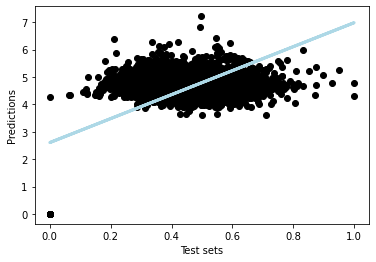

In [158]:
plt.scatter(X_test.iloc[:, 0], y_test, color='black')
plt.plot(X_test.iloc[:, 0], y_pred_test, color='lightblue', linewidth=3)
plt.xlabel("Test sets")
plt.ylabel("Predictions")
plt.show()